In [25]:
!pip install -q statsmodels
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import statsmodels.api as sm
import matplotlib.dates as mdates
import numpy as np
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.filterwarnings("ignore", category=UserWarning)

Q1

A

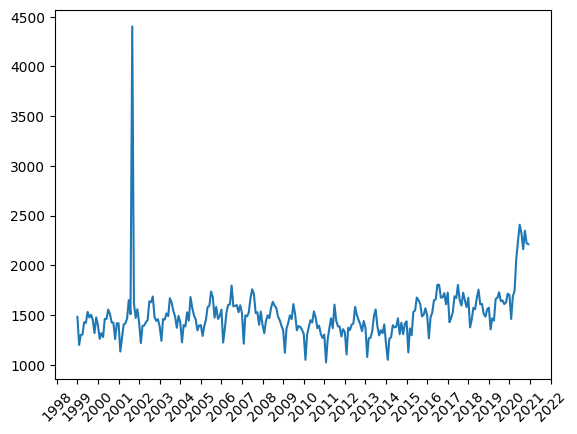

In [26]:
df = pd.read_csv('/content/sample_data/Monthly_Homicide_USA - Monthly_Homicide_USA.csv')
df['Month'] = pd.to_datetime(df['Month'])
df.reset_index(drop=True, inplace=True)
fig, ax = plt.subplots()
ax.plot(df['Month'], df['Value'])
ax.xaxis.set_major_locator(mdates.YearLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.xticks(rotation=45)
plt.show()

Q2

In [27]:
last_12_rows = df.tail(12)
num_rows = df.shape[0]
new_df = df.iloc[:num_rows - 12]
print(last_12_rows)

         Month  Value
252 2020-01-01   1702
253 2020-02-01   1461
254 2020-03-01   1686
255 2020-04-01   1742
256 2020-05-01   2061
257 2020-06-01   2245
258 2020-07-01   2408
259 2020-08-01   2326
260 2020-09-01   2162
261 2020-10-01   2348
262 2020-11-01   2222
263 2020-12-01   2213


A

In [28]:
new_df.set_index('Month', inplace=True)
values_array = new_df['Value'].values
result_sunspots = adfuller(new_df)
print('ADF Statistic:', result_sunspots[0])
print('p-value:', result_sunspots[1])
print('Critical Values:', result_sunspots[4])

ADF Statistic: -2.187939286539933
p-value: 0.21065188421816283
Critical Values: {'1%': -3.4578942529658563, '5%': -2.8736593200231484, '10%': -2.573228767361111}


B

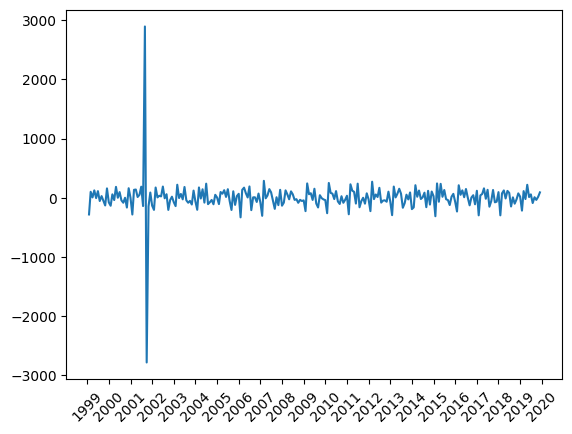

ADF Statistic for Differenced Series: -10.84188911249693
p-value for Differenced Series: 1.608132749691253e-19
Critical Values for Differenced Series: {'1%': -3.4578942529658563, '5%': -2.8736593200231484, '10%': -2.573228767361111}


In [29]:
data_new = new_df.diff().dropna()
fig, ax = plt.subplots()
ax.plot(data_new.index, data_new['Value'])
ax.xaxis.set_major_locator(mdates.YearLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.xticks(rotation=45)
plt.show()
result_diff = adfuller(data_new)
print('ADF Statistic for Differenced Series:', result_diff[0])
print('p-value for Differenced Series:', result_diff[1])
print('Critical Values for Differenced Series:', result_diff[4])

C

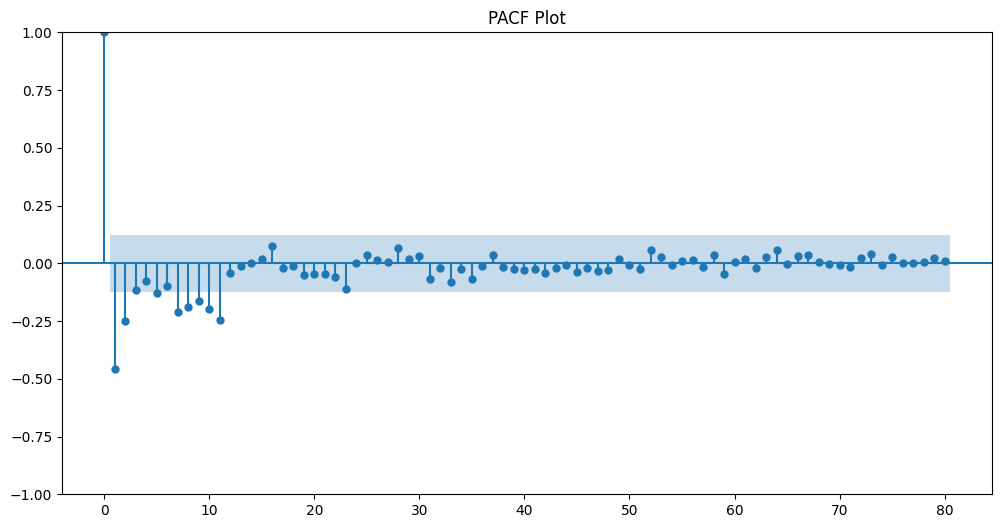

In [30]:
fig, ax = plt.subplots(figsize=(12, 6))
plot_pacf(data_new, lags=80, ax=ax)
plt.title('PACF Plot')
plt.show()

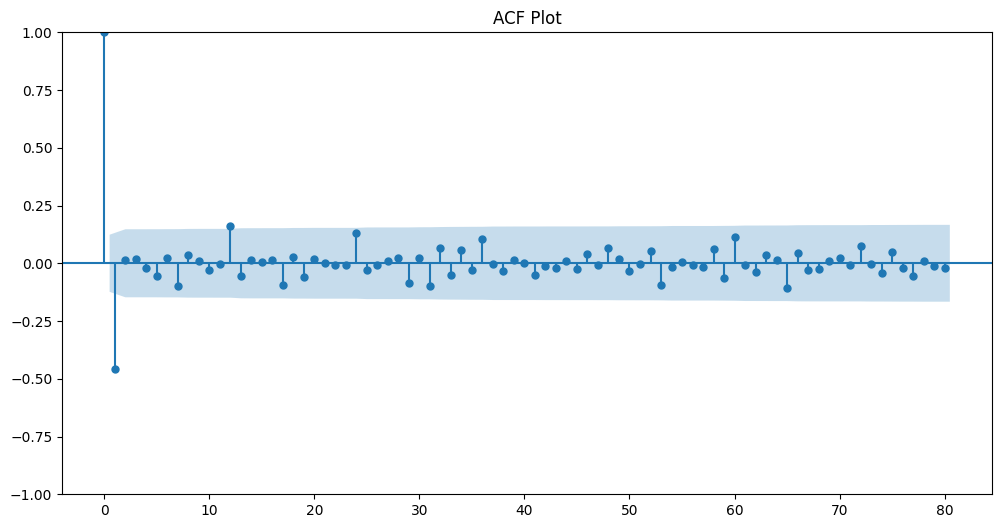

In [31]:
fig, ax = plt.subplots(figsize=(12, 6))
plot_acf(data_new, lags=80, ax=ax)
plt.title('ACF Plot')
plt.show()

D

In [32]:
model = ARIMA(new_df, order=(2,1,1))
model_fit = model.fit()
print(model_fit.summary())
print(new_df)

                               SARIMAX Results                                
Dep. Variable:                  Value   No. Observations:                  252
Model:                 ARIMA(2, 1, 1)   Log Likelihood               -1715.939
Date:                Mon, 29 Jan 2024   AIC                           3439.879
Time:                        19:19:49   BIC                           3453.981
Sample:                    01-01-1999   HQIC                          3445.554
                         - 12-01-2019                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1988      0.049      4.037      0.000       0.102       0.295
ar.L2          0.1173      0.048      2.453      0.014       0.024       0.211
ma.L1         -0.9536      0.045    -20.996      0.0

E

In [33]:
model_2 = ARIMA(new_df, order=(2,1,0))
model_fit_2 = model_2.fit()
print(model_fit_2.summary())


                               SARIMAX Results                                
Dep. Variable:                  Value   No. Observations:                  252
Model:                 ARIMA(2, 1, 0)   Log Likelihood               -1735.273
Date:                Mon, 29 Jan 2024   AIC                           3476.545
Time:                        19:19:50   BIC                           3487.121
Sample:                    01-01-1999   HQIC                          3480.801
                         - 12-01-2019                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5717      0.016    -34.915      0.000      -0.604      -0.540
ar.L2         -0.2481      0.020    -12.275      0.000      -0.288      -0.208
sigma2      5.945e+04    857.120     69.358      0.0

F

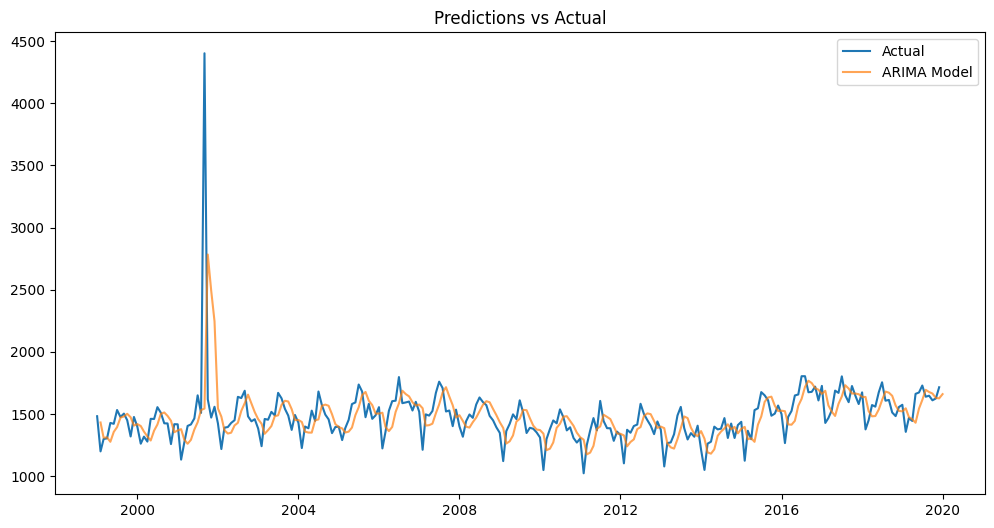

In [34]:
predictions = model_fit_2.predict(start=1, end=len(new_df))
plt.figure(figsize=(12, 6))
plt.plot(new_df, label='Actual')
plt.plot(predictions, label='ARIMA Model',alpha=0.7)
plt.title('Predictions vs Actual')
plt.legend()
plt.show()


Q3

A

        Month        Value
0  2020-01-01  1659.823721
1  2020-02-01  1669.040120
2  2020-03-01  1677.460140
3  2020-04-01  1670.359662
4  2020-05-01  1672.330142
5  2020-06-01  1672.965206
6  2020-07-01  1672.113252
7  2020-08-01  1672.442772
8  2020-09-01  1672.465748
9  2020-10-01  1672.370858
10 2020-11-01  1672.419408
11 2020-12-01  1672.415194


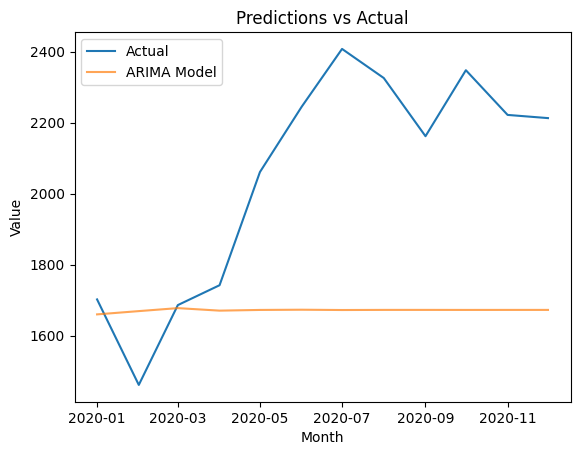

In [35]:
predictions = model_fit_2.predict(start=252,end=263)
model1 =  pd.DataFrame({"Month": predictions.index, "Value": predictions[0:]})
model1.reset_index(drop=True, inplace=True)
print(model1)
plt.plot(last_12_rows['Month'], last_12_rows['Value'], label='Actual')
plt.plot(model1['Month'], model1['Value'], label='ARIMA Model', alpha=0.7)
plt.title('Predictions vs Actual')
plt.xlabel('Month')
plt.ylabel('Value')
plt.legend()
plt.show()

B

In [36]:
df.set_index('Month', inplace=True)

In [37]:
print(new_df)

            Value
Month            
1999-01-01   1482
1999-02-01   1199
1999-03-01   1299
1999-04-01   1304
1999-05-01   1428
...           ...
2019-08-01   1639
2019-09-01   1647
2019-10-01   1610
2019-11-01   1625
2019-12-01   1715

[252 rows x 1 columns]


In [38]:
list_of_preds = [
    ARIMA(df[:-12 + i], order=(2, 1, 0)).fit().predict(start=len(new_df) + i, end=len(new_df) + i).values[0]
    for i in range(12)
]

model2 = pd.DataFrame({"Month": df.index[-12:], "Value": list_of_preds})
model2.reset_index(drop=True, inplace=True)
model2



,Month,Value
0,2020-01-01,1659.823721
1,2020-02-01,1687.112815
2,2020-03-01,1602.059375
3,2020-04-01,1617.238957
4,2020-05-01,1653.501946
5,2020-06-01,1866.044014
6,2020-07-01,2065.461275
7,2020-08-01,2275.287077
8,2020-09-01,2333.726844
9,2020-10-01,2271.580553


Q4

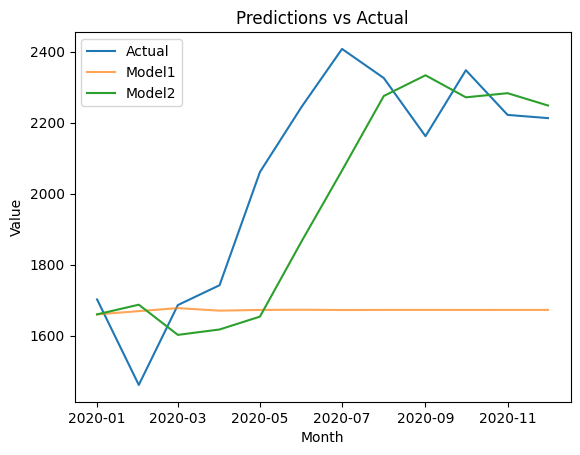

In [39]:
plt.plot(last_12_rows['Month'], last_12_rows['Value'], label='Actual')
plt.plot(predictions.index, predictions, label='Model1', alpha=0.7)
plt.plot(model2['Month'], model2['Value'], label='Model2')
plt.title('Predictions vs Actual')
plt.xlabel('Month')
plt.ylabel('Value')
plt.legend()
plt.show()

Q5

In [40]:
model2.reset_index(drop=True, inplace=True)
last_12_rows.reset_index(drop=True, inplace=True)

In [41]:
rmse1 = np.mean((model1['Value'] - last_12_rows['Value'])**2)**.5
rmse2 = np.mean((model2['Value'] - last_12_rows['Value'])**2)**.5
print(f'RMSE for model1: {rmse1:.3f}')
print(f'RMSE for model2: {rmse2:.3f}')

RMSE for model1: 481.976
RMSE for model2: 213.196
